Prediction Challenge 1 – Deep Learning
Description
Image classification with a feed forward deep neural network, using tuning techniques to improve 
the accuracy.
Design your own feed forward deep neural network to classify images from the Fashion-MNIST 
dataset. Use the RELU activation function and the Adam optimiser. Change the other parameters of 
the network and hyperparameters to achieve the best accuracy.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


In [ ]:
from keras.datasets import fashion_mnist


In [ ]:
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print the shape of the training set
print("Training set shape:", X_train.shape)

# Print the shape of the test set
print("Test set shape:", X_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3)


Epoch 1/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5308 - accuracy: 0.8124 - val_loss: 0.4361 - val_accuracy: 0.8406
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3881 - accuracy: 0.8589 - val_loss: 0.4037 - val_accuracy: 0.8551
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3503 - accuracy: 0.8702 - val_loss: 0.3554 - val_accuracy: 0.8711
Epoch 4/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.8805 - val_loss: 0.3333 - val_accuracy: 0.8783
Epoch 5/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3025 - accuracy: 0.8875 - val_loss: 0.3325 - val_accuracy: 0.8793
Epoch 6/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2854 - accuracy: 0.8934 - val_loss: 0.3662 - val_accuracy: 0.8706
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2746 - accuracy: 0.8985 - val_loss: 0.3865 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8856
Test accuracy: 0.8855999708175659


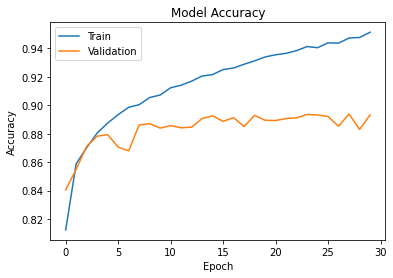

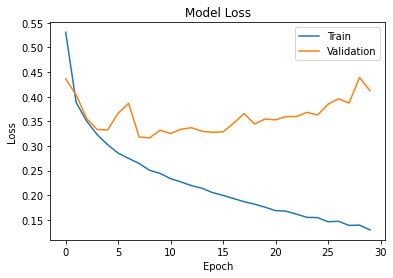

In [ ]:
import matplotlib.pyplot as plt

# Train the model and record the training history
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
from keras.layers import Dropout

model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(64, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(32, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(10, activation='softmax')
])

model2.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3)


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7419 - accuracy: 0.7351 - val_loss: 0.4654 - val_accuracy: 0.8306
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5108 - accuracy: 0.8192 - val_loss: 0.4084 - val_accuracy: 0.8506
Epoch 3/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4550 - accuracy: 0.8404 - val_loss: 0.3886 - val_accuracy: 0.8563
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4294 - accuracy: 0.8477 - val_loss: 0.3803 - val_accuracy: 0.8606
Epoch 5/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4056 - accuracy: 0.8545 - val_loss: 0.3880 - val_accuracy: 0.8607
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3923 - accuracy: 0.8614 - val_loss: 0.3600 - val_accuracy: 0.8672
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3762 - accuracy: 0.8660 - val_loss: 0.3634 - val_accuracy:

In [ ]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8838
Test accuracy: 0.8838000297546387


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

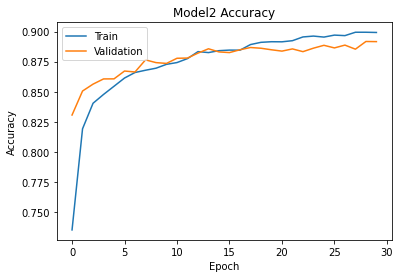

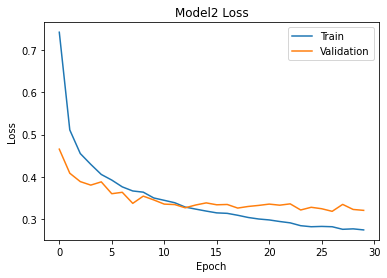

In [ ]:
import matplotlib.pyplot as plt

# Train the model and record the training history
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation accuracy curves
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping



# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)


model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(64, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(32, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(10, activation='softmax')
])

model3.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stop])







/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7383 - accuracy: 0.7422 - val_loss: 0.4395 - val_accuracy: 0.8428
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4932 - accuracy: 0.8260 - val_loss: 0.4230 - val_accuracy: 0.8423
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4483 - accuracy: 0.8422 - val_loss: 0.3837 - val_accuracy: 0.8576
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4209 - accuracy: 0.8525 - val_loss: 0.3693 - val_accuracy: 0.8669
Epoch 5/100
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4032 - accuracy: 0.8575 - val_loss: 0.3676 - val_accuracy: 0.8654
Epoch 6/100
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3893 - accuracy: 0.8635 - val_loss: 0.3723 - val_accuracy: 0.8639
Epoch 7/100
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3741 - accuracy: 0.8659 - val_loss: 0.3511 - val_ac

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)               

313/313 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8758
Test accuracy: 0.8758000135421753


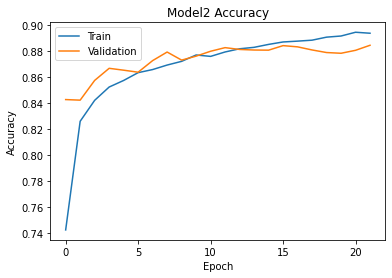

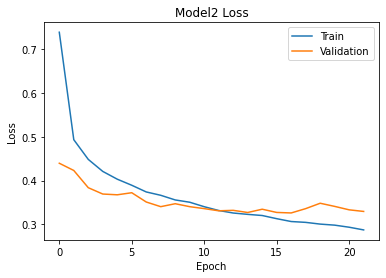

In [ ]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy curves
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The model architecture implemented is a feedforward neural network with 4 dense layers, and dropout regularization has been applied between the dense layers to prevent overfitting. The input layer has 28x28=784 neurons, which is flattened to a one-dimensional array. The first hidden layer has 128 neurons and ReLU activation, followed by a dropout layer with a rate of 0.2. The second hidden layer has 64 neurons and ReLU activation, followed by another dropout layer with a rate of 0.2. The third hidden layer has 32 neurons and ReLU activation, followed by a dropout layer with a rate of 0.2. The output layer has 10 neurons with softmax activation, representing the 10 classes in the Fashion-MNIST dataset. The model uses the Adam optimizer with a learning rate of 0.001 and is trained for 30 epochs with a batch size of 32. The loss function used is sparse categorical cross-entropy, and the model is evaluated using accuracy as a metric.

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2155 - accuracy: 0.9264 - val_loss: 0.3781 - val_accuracy: 0.8847
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1901 - accuracy: 0.9327 - val_loss: 0.3630 - val_accuracy: 0.8863
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1802 - accuracy: 0.9340 - val_loss: 0.3596 - val_accuracy: 0.8883
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1722 - accuracy: 0.9367 - val_loss: 0.3935 - val_accuracy: 0.8808
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1634 - accuracy: 0.9390 - val_loss: 0.4034 - val_accuracy: 0.8848
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1627 - accuracy: 0.9397 - val_loss: 0.3939 - val_accuracy: 0.8849
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1541 - accuracy: 0.9430 - val_loss: 0.3979 - val_accuracy

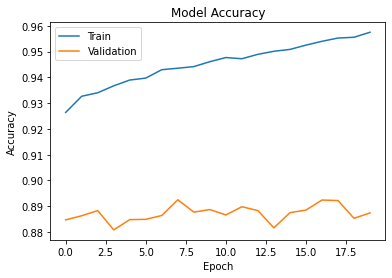

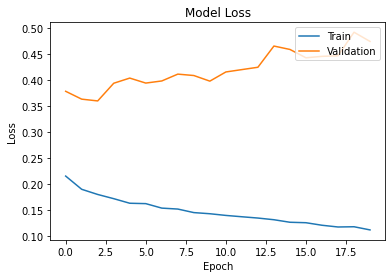

In [ ]:
import matplotlib.pyplot as plt

# Train the model and record the training history
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#second check

with different parameters

In [ ]:
model5 = Sequential([
    Flatten(input_shape=(28, 28,1)),
    Dense(10, activation='relu'),
    Dense(14, activation='relu'),
    #Dense(10, activation='softmax')
])
model5.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=50, 
                     validation_split=0.3)

test_loss, test_acc = model5.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
1313/1313 [==============================] - 4s 2ms/step - loss: 2.6964 - accuracy: 0.4965 - val_loss: 3.5723 - val_accuracy: 0.3672
Epoch 2/50
1313/1313 [==============================] - 3s 3ms/step - loss: 3.3480 - accuracy: 0.4398 - val_loss: 3.1748 - val_accuracy: 0.4578
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 3.2931 - accuracy: 0.4021 - val_loss: 3.1689 - val_accuracy: 0.4134
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 3.2421 - accuracy: 0.4210 - val_loss: 3.1541 - val_accuracy: 0.4513
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 3.3806 - accuracy: 0.3070 - val_loss: 2.6045 - val_accuracy: 0.2321
Epoch 6/50
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3975 - accuracy: 0.2170 - val_loss: 2.3601 - val_accuracy: 0.2154
Epoch 7/50
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3737 - accuracy: 0.2061 - val_loss: 2.3514 - val_accuracy:

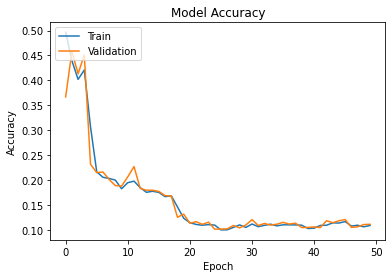

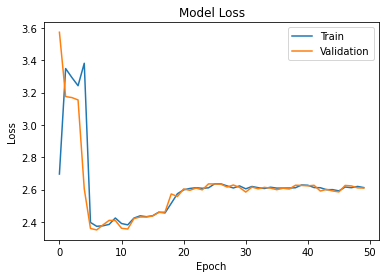

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model4 = Sequential([
    Flatten(input_shape=(28, 28,1)),
    Dense(128, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(64, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(32, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(10, activation='softmax')
])

model4.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history4 = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stop])



Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1313/1313 [==============================] - 8s 5ms/step - loss: 0.7490 - accuracy: 0.7338 - val_loss: 0.4681 - val_accuracy: 0.8298
Epoch 2/100
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5079 - accuracy: 0.8194 - val_loss: 0.4256 - val_accuracy: 0.8452
Epoch 3/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4571 - accuracy: 0.8384 - val_loss: 0.3807 - val_accuracy: 0.8627
Epoch 4/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4241 - accuracy: 0.8498 - val_loss: 0.3734 - val_accuracy: 0.8672
Epoch 5/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4062 - accuracy: 0.8557 - val_loss: 0.3608 - val_accuracy: 0.8702
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3890 - accuracy: 0.8619 - val_loss: 0.3676 - val_accuracy: 0.8676
Epoch 7/100
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3744 - accuracy: 0.8653 - val_loss: 0.3534 - val_accuracy: 0.87

In [ ]:
test_loss, test_acc = model4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8680
Test accuracy: 0.8679999709129333


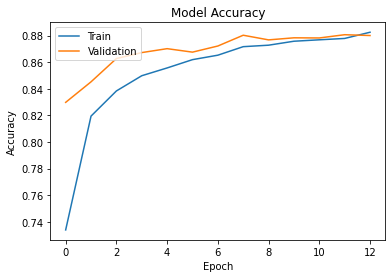

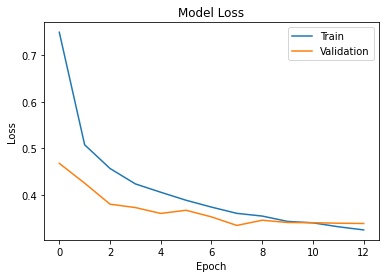

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
840/840 [==============================] - 5s 5ms/step - loss: 0.7609 - accuracy: 0.7327 - val_loss: 0.4518 - val_accuracy: 0.8331
Epoch 2/100
840/840 [==============================] - 4s 4ms/step - loss: 0.5004 - accuracy: 0.8256 - val_loss: 0.4063 - val_accuracy: 0.8467
Epoch 3/100
840/840 [==============================] - 4s 4ms/step - loss: 0.4502 - accuracy: 0.8434 - val_loss: 0.3824 - val_accuracy: 0.8642
Epoch 4/100
840/840 [==============================] - 4s 5ms/step - loss: 0.4186 - accuracy: 0.8525 - val_loss: 0.3772 - val_accuracy: 0.8647
Epoch 5/100
840/840 [==============================] - 4s 4ms/step - loss: 0.3978 - accuracy: 0.8593 - val_loss: 0.3551 - val_accuracy: 0.8677
Epoch 6/100
840/840 [==============================] - 3s 4ms/step - loss: 0.3812 - accuracy: 0.8638 - val_loss: 0.3551 - val_accuracy: 0.8678
Epoch 7/100
840/840 [==============================] - 4s 5ms/step - loss: 0.3713 - accuracy: 0.8679 - val_loss: 0.3573 - val_accuracy: 0.8663

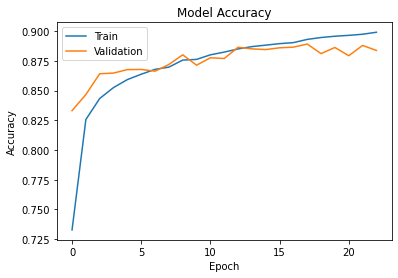

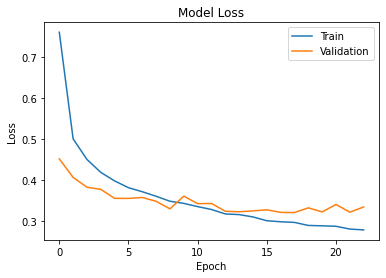

In [ ]:
model6 = Sequential([
    Flatten(input_shape=(28, 28,1)),
    Dense(128, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(64, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(32, activation='relu'),
    Dropout(0.2), # Add dropout with a rate of 0.2
    Dense(10, activation='softmax')
])

model6.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history6 = model6.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.3, callbacks=[early_stop])

test_loss, test_acc = model6.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy curves
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [ ]:
model6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)               

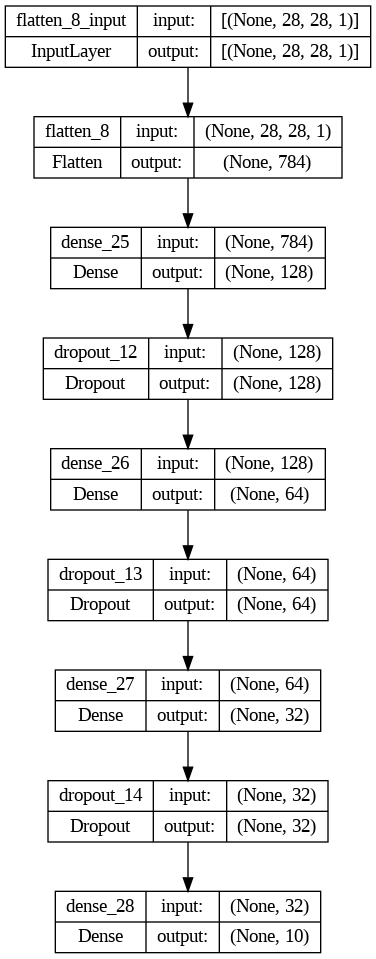

In [ ]:
from keras.utils import plot_model

plot_model(model6, to_file='model6.png', show_shapes=True)